<a href="https://www.kaggle.com/code/alymahmoudd/house-plant-species?scriptVersionId=294653710" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

folds=('/kaggle/input/house-plant-species/house_plant_species')

labels=[]
filepaths=[]


for fold in os.listdir(folds):
    fullpath=os.path.join(folds,fold)
    for filename in os.listdir(fullpath):
        full_path=os.path.join(fullpath,filename)
        filepaths.append(full_path)
        labels.append(fold)
        
    

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2026-01-29 00:38:57.608646: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769647138.065660      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769647138.196457      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769647139.350313      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769647139.350394      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769647139.350397      55 computation_placer.cc:177] computation placer alr

In [2]:
df=pd.DataFrame(data={"filepaths":filepaths, "labels":labels})
df   

,filepaths,labels
0,/kaggle/input/house-plant-species/house_plant_...,Orchid
1,/kaggle/input/house-plant-species/house_plant_...,Orchid
2,/kaggle/input/house-plant-species/house_plant_...,Orchid
3,/kaggle/input/house-plant-species/house_plant_...,Orchid
4,/kaggle/input/house-plant-species/house_plant_...,Orchid
...,...,...
14785,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)
14786,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)
14787,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)
14788,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)


In [3]:
df['labels'].value_counts()

labels
Monstera Deliciosa (Monstera deliciosa)       547
Dumb Cane (Dieffenbachia spp.)                541
Chinese evergreen (Aglaonema)                 514
Lilium (Hemerocallis)                         480
Anthurium (Anthurium andraeanum)              455
ZZ Plant (Zamioculcas zamiifolia)             438
Daffodils (Narcissus spp.)                    421
Lily of the valley (Convallaria majalis)      416
Prayer Plant (Maranta leuconeura)             400
Snake plant (Sanseviera)                      396
Peace lily                                    385
Chinese Money Plant (Pilea peperomioides)     382
Money Tree (Pachira aquatica)                 359
Jade plant (Crassula ovata)                   353
Ctenanthe                                     347
Tulip                                         341
Polka Dot Plant (Hypoestes phyllostachya)     341
Tradescantia                                  341
African Violet (Saintpaulia ionantha)         337
Elephant Ear (Alocasia spp.)               

In [4]:
train_df,df_to_split=train_test_split(df,test_size=0.4,random_state=42,stratify=df['labels'])


In [5]:
train_df

,filepaths,labels
3393,/kaggle/input/house-plant-species/house_plant_...,Chinese evergreen (Aglaonema)
3050,/kaggle/input/house-plant-species/house_plant_...,Sago Palm (Cycas revoluta)
1770,/kaggle/input/house-plant-species/house_plant_...,Snake plant (Sanseviera)
1320,/kaggle/input/house-plant-species/house_plant_...,Areca Palm (Dypsis lutescens)
10067,/kaggle/input/house-plant-species/house_plant_...,ZZ Plant (Zamioculcas zamiifolia)
...,...,...
4882,/kaggle/input/house-plant-species/house_plant_...,Parlor Palm (Chamaedorea elegans)
14587,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)
13859,/kaggle/input/house-plant-species/house_plant_...,Tradescantia
8533,/kaggle/input/house-plant-species/house_plant_...,Lilium (Hemerocallis)


In [6]:
df_valid,df_test=train_test_split(df_to_split,test_size=0.5,random_state=42,stratify=df_to_split['labels'])
df_valid

,filepaths,labels
11532,/kaggle/input/house-plant-species/house_plant_...,Rubber Plant (Ficus elastica)
3127,/kaggle/input/house-plant-species/house_plant_...,Cast Iron Plant (Aspidistra elatior)
68,/kaggle/input/house-plant-species/house_plant_...,Orchid
7779,/kaggle/input/house-plant-species/house_plant_...,Ponytail Palm (Beaucarnea recurvata)
12690,/kaggle/input/house-plant-species/house_plant_...,Tulip
...,...,...
5587,/kaggle/input/house-plant-species/house_plant_...,Peace lily
14229,/kaggle/input/house-plant-species/house_plant_...,African Violet (Saintpaulia ionantha)
408,/kaggle/input/house-plant-species/house_plant_...,Chrysanthemum
3654,/kaggle/input/house-plant-species/house_plant_...,Chinese evergreen (Aglaonema)


In [7]:
df_test

,filepaths,labels
14184,/kaggle/input/house-plant-species/house_plant_...,African Violet (Saintpaulia ionantha)
13962,/kaggle/input/house-plant-species/house_plant_...,Tradescantia
13375,/kaggle/input/house-plant-species/house_plant_...,Anthurium (Anthurium andraeanum)
11048,/kaggle/input/house-plant-species/house_plant_...,Polka Dot Plant (Hypoestes phyllostachya)
352,/kaggle/input/house-plant-species/house_plant_...,Chrysanthemum
...,...,...
2696,/kaggle/input/house-plant-species/house_plant_...,Hyacinth (Hyacinthus orientalis)
4241,/kaggle/input/house-plant-species/house_plant_...,Daffodils (Narcissus spp.)
2435,/kaggle/input/house-plant-species/house_plant_...,Bird of Paradise (Strelitzia reginae)
14332,/kaggle/input/house-plant-species/house_plant_...,Pothos (Ivy arum)


In [8]:

df_valid['labels'].value_counts()

labels
Monstera Deliciosa (Monstera deliciosa)       110
Dumb Cane (Dieffenbachia spp.)                108
Chinese evergreen (Aglaonema)                 103
Lilium (Hemerocallis)                          96
Anthurium (Anthurium andraeanum)               91
ZZ Plant (Zamioculcas zamiifolia)              87
Daffodils (Narcissus spp.)                     84
Lily of the valley (Convallaria majalis)       83
Prayer Plant (Maranta leuconeura)              80
Snake plant (Sanseviera)                       79
Peace lily                                     77
Chinese Money Plant (Pilea peperomioides)      76
Money Tree (Pachira aquatica)                  72
Jade plant (Crassula ovata)                    71
Ctenanthe                                      70
Tradescantia                                   69
Tulip                                          68
Polka Dot Plant (Hypoestes phyllostachya)      68
African Violet (Saintpaulia ionantha)          68
Calathea                                   

In [9]:
df_test['labels'].value_counts()

labels
Monstera Deliciosa (Monstera deliciosa)       109
Dumb Cane (Dieffenbachia spp.)                108
Chinese evergreen (Aglaonema)                 103
Lilium (Hemerocallis)                          96
Anthurium (Anthurium andraeanum)               91
ZZ Plant (Zamioculcas zamiifolia)              88
Daffodils (Narcissus spp.)                     84
Lily of the valley (Convallaria majalis)       83
Prayer Plant (Maranta leuconeura)              80
Snake plant (Sanseviera)                       79
Chinese Money Plant (Pilea peperomioides)      77
Peace lily                                     77
Money Tree (Pachira aquatica)                  72
Jade plant (Crassula ovata)                    70
Ctenanthe                                      69
Tradescantia                                   68
Tulip                                          68
Polka Dot Plant (Hypoestes phyllostachya)      68
Elephant Ear (Alocasia spp.)                   67
African Violet (Saintpaulia ionantha)      

In [10]:
gen=ImageDataGenerator()

train_gen=gen.flow_from_dataframe(train_df,x_col='filepaths',y_col='labels',target_size=(224,224),
                                 class_mode='categorical',color_mode='rgb',batch_size=16
                                 ,)
valid_gen=gen.flow_from_dataframe(df_valid,x_col='filepaths',y_col='labels',target_size=(224,224),
                                 class_mode='categorical',color_mode='rgb',batch_size=16
                    )
test_gen=gen.flow_from_dataframe(df_test,x_col='filepaths',y_col='labels',target_size=(224,224),
                                class_mode='categorical',color_mode='rgb',batch_size=16
                                )

Found 8767 validated image filenames belonging to 47 classes.
Found 2937 validated image filenames belonging to 47 classes.
Found 2916 validated image filenames belonging to 47 classes.


In [11]:
early_stop=EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

model=Sequential([
    Input((224,224,3)),
    Conv2D(224,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(64,activation='relu'),
    Dropout(0.3),

    Dense(47,activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

I0000 00:00:1769647200.385254      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1769647200.389296      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 224)  │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 224)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │       258,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 373248)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    47,775,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 47)             │         3,055 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,051,631 (183.30 MB)

 Trainable params: 48,051,631 (183.30 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history=model.fit(train_gen,epochs=10,validation_data=valid_gen,callbacks=[early_stop])

Epoch 1/10


I0000 00:00:1769647207.002394     126 service.cc:152] XLA service 0x7e8254003b40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1769647207.002434     126 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1769647207.002438     126 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1769647207.523157     126 cuda_dnn.cc:529] Loaded cuDNN version 91002


  1/548 ━━━━━━━━━━━━━━━━━━━━ 2:05:22 14s/step - accuracy: 0.0000e+00 - loss: 44.7277

I0000 00:00:1769647217.986661     126 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


548/548 ━━━━━━━━━━━━━━━━━━━━ 438s 776ms/step - accuracy: 0.0247 - loss: 25.6248 - val_accuracy: 0.0351 - val_loss: 3.8468
Epoch 2/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 294s 536ms/step - accuracy: 0.0342 - loss: 3.8469 - val_accuracy: 0.0364 - val_loss: 3.8437
Epoch 3/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 277s 505ms/step - accuracy: 0.0311 - loss: 3.8459 - val_accuracy: 0.0364 - val_loss: 3.8406
Epoch 4/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 287s 524ms/step - accuracy: 0.0374 - loss: 3.8405 - val_accuracy: 0.0364 - val_loss: 3.8378
Epoch 5/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 281s 513ms/step - accuracy: 0.0383 - loss: 3.8369 - val_accuracy: 0.0364 - val_loss: 3.8351
Epoch 6/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 282s 515ms/step - accuracy: 0.0373 - loss: 3.8339 - val_accuracy: 0.0364 - val_loss: 3.8323
Epoch 7/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 283s 517ms/step - accuracy: 0.0378 - loss: 3.8313 - val_accuracy: 0.0364 - val_loss: 3.8298
Epoch 8/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 280s 511ms/step - accuracy: 0.0348 - loss: 3.8

In [13]:
model.evaluate(train_gen)

548/548 ━━━━━━━━━━━━━━━━━━━━ 191s 348ms/step - accuracy: 0.0373 - loss: 3.8230


[3.8222663402557373, 0.036272384226322174]

In [14]:
model.evaluate(valid_gen)

184/184 ━━━━━━━━━━━━━━━━━━━━ 68s 371ms/step - accuracy: 0.0338 - loss: 3.8242


[3.8225762844085693, 0.03643173351883888]

In [15]:
model.evaluate(test_gen)

183/183 ━━━━━━━━━━━━━━━━━━━━ 104s 565ms/step - accuracy: 0.0340 - loss: 3.8216


[3.822371482849121, 0.03635116666555405]

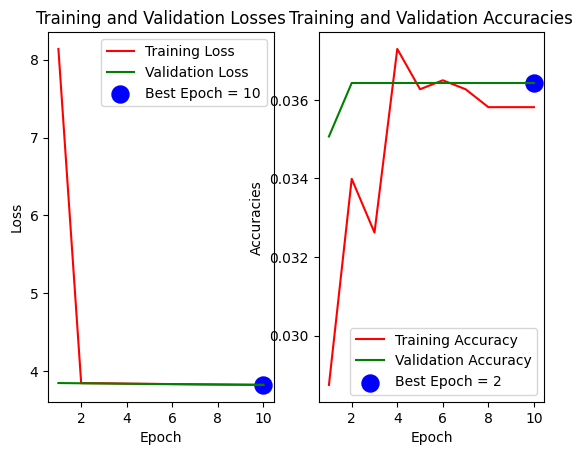

In [16]:
tr_acc=history.history['accuracy']
tr_loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']
index_loss=np.argmin(val_loss)
val_lowest=val_loss[index_loss]
index_acc=np.argmax(val_acc)
acc_highest=val_acc[index_acc]

Epochs=[i+1 for i in range(len(tr_acc))]
loss_label=f"Best Epoch = {str(index_loss+1)}"
acc_label=f"Best Epoch = {str(index_acc+1)}"

#plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(Epochs,tr_loss,'r',label='Training Loss')
plt.plot(Epochs,val_loss,'g',label='Validation Loss')
plt.scatter(index_loss+1,val_lowest,s=150,c='blue',label=loss_label)
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs,tr_acc,'r',label='Training Accuracy')
plt.plot(Epochs,val_acc,'g',label='Validation Accuracy')
plt.scatter(index_loss+1,acc_highest,s=150,c='blue',label=acc_label)
plt.title("Training and Validation Accuracies")
plt.xlabel("Epoch")
plt.ylabel('Accuracies')
plt.legend()
plt.show()



In [17]:
base_model=tf.keras.applications.EfficientNetB4(
    include_top=False,
    input_shape=(224,224,3),
    pooling=max,
)


model=Sequential([
    base_model,
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(47,activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)     │ (None, 7, 7, 1792)     │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 87808)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    11,239,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 47)             │         3,055 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,924,686 (110.34 MB)

 Trainable params: 28,799,479 (109.86 MB)

 Non-trainable params: 125,207 (489.09 KB)

In [18]:
history=model.fit(train_gen,epochs=10,validation_data=valid_gen,callbacks=[early_stop])

Epoch 1/10


2026-01-29 01:37:12.805893: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 01:37:12.940220: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 01:37:13.183515: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 01:37:13.322821: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 01:37:13.581980: E external/local_xla/xla/stream_

519/548 ━━━━━━━━━━━━━━━━━━━━ 11s 399ms/step - accuracy: 0.3084 - loss: 2.7738

2026-01-29 01:41:59.899501: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 01:42:00.033630: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 01:42:00.267895: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 01:42:00.407154: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 01:42:00.660296: E external/local_xla/xla/stream_

548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.3189 - loss: 2.7296

2026-01-29 01:44:25.158279: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 01:44:25.291989: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 01:44:25.515601: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 01:44:25.652205: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 01:44:25.890079: E external/local_xla/xla/stream_

548/548 ━━━━━━━━━━━━━━━━━━━━ 537s 701ms/step - accuracy: 0.3193 - loss: 2.7281 - val_accuracy: 0.7838 - val_loss: 0.8014
Epoch 2/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 271s 495ms/step - accuracy: 0.8791 - loss: 0.4353 - val_accuracy: 0.8281 - val_loss: 0.6432
Epoch 3/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 272s 496ms/step - accuracy: 0.9504 - loss: 0.1661 - val_accuracy: 0.8277 - val_loss: 0.6896
Epoch 4/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 262s 477ms/step - accuracy: 0.9727 - loss: 0.0917 - val_accuracy: 0.8335 - val_loss: 0.7087


In [19]:
model.evaluate(test_gen)

182/183 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.8246 - loss: 0.6683

2026-01-29 01:59:11.816211: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 01:59:11.949685: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 01:59:12.176523: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 01:59:12.311472: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 01:59:12.545368: E external/local_xla/xla/stream_

183/183 ━━━━━━━━━━━━━━━━━━━━ 80s 439ms/step - accuracy: 0.8246 - loss: 0.6682


[0.6595587730407715, 0.8268175721168518]

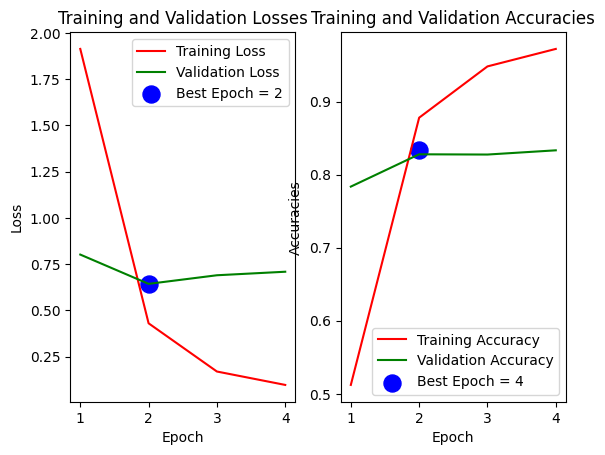

In [20]:
tr_acc=history.history['accuracy']
tr_loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']
index_loss=np.argmin(val_loss)
val_lowest=val_loss[index_loss]
index_acc=np.argmax(val_acc)
acc_highest=val_acc[index_acc]

Epochs=[i+1 for i in range(len(tr_acc))]
loss_label=f"Best Epoch = {str(index_loss+1)}"
acc_label=f"Best Epoch = {str(index_acc+1)}"

#plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(Epochs,tr_loss,'r',label='Training Loss')
plt.plot(Epochs,val_loss,'g',label='Validation Loss')
plt.scatter(index_loss+1,val_lowest,s=150,c='blue',label=loss_label)
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs,tr_acc,'r',label='Training Accuracy')
plt.plot(Epochs,val_acc,'g',label='Validation Accuracy')
plt.scatter(index_loss+1,acc_highest,s=150,c='blue',label=acc_label)
plt.title("Training and Validation Accuracies")
plt.xlabel("Epoch")
plt.ylabel('Accuracies')
plt.legend()
plt.show()



In [21]:
model.save("plant_classifier.h5")

In [22]:
model = tf.keras.models.load_model("plant_classifier.h5")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()

# Save TFLite model
with open("plant_classifier.tflite", "wb") as f:
    f.write(tflite_model)

print("TFLite model saved successfully!")


INFO:tensorflow:Assets written to: /tmp/tmptewlnirt/assets


INFO:tensorflow:Assets written to: /tmp/tmptewlnirt/assets


Saved artifact at '/tmp/tmptewlnirt'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 47), dtype=tf.float32, name=None)
Captures:
  139097996394576: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  139097996397264: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  139097996397456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139097996396688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139097996395152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139097996398224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139097996398800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139097996396304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139097996395920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139097996398608: TensorSpec(shape=(), dtype=tf.resource, name=No

W0000 00:00:1769651990.185904      55 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1769651990.185950      55 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1769651990.613662      55 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled


TFLite model saved successfully!


In [23]:
import shutil

shutil.move("/kaggle/working/plant_classifier.tflite", "/kaggle/working/download_model.tflite")


'/kaggle/working/download_model.tflite'